Nama : Ayu Wulandari

Email : dari19556@gmail.com

Tugas : Image Classification Model Deployment

Kriteria Submission yang dibuat:

1.   Menggunakan 16k dataset
2.   Dataset dibagi menjadi 80% train set dan 20% test set
3. Model yang dibuat menggunakan model sequential, Conv2D Maxpooling Layer
4. Akurasi mencapai >92%
5. Menggunakan callback
6. Membuat plot terhadap akurasi dan loss model
7. Menulis kode untuk menyimpan model ke dalam format TF-Lite



In [1]:
from google.colab import files
files.upload()

Saving archive(3).zip to archive(3).zip


In [2]:
import zipfile,os

local_zip = 'archive(3).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/train/train'

In [3]:
os.listdir(base_dir)

['Orange',
 'Grape Blue',
 'Plum',
 'Avocado',
 'Cherry',
 'Apple Braeburn',
 'Cucumber Ripe',
 'Pear',
 'Papaya',
 'Limes',
 'Apricot',
 'Lemon',
 'Pomegranate',
 'Tomato',
 'Strawberry',
 'Cactus fruit',
 'Clementine',
 'Potato Red',
 'Corn',
 'Apple Granny Smith',
 'Pepper Red',
 'Pepper Green',
 'Banana',
 'Mango',
 'Blueberry',
 'Watermelon',
 'Onion White',
 'Kiwi',
 'Passion Fruit',
 'Peach',
 'Pineapple',
 'Cantaloupe',
 'Raspberry']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.2,0.6),
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  brightness_range=(0.2,0.6),
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.2,
                                  fill_mode='nearest')

In [9]:
train_generator = training_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    class_mode='categorical',
    subset='training',
    shuffle=True
)
 
validation_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


In [24]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), 
                                                           activation='relu', 
                                                           input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(33, activation='softmax')
])


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 74, 74, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 36, 36, 64)        256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)      

In [25]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.997):
            print("\nReached 99.7% accuracy so cancelling training!")
            self.model.stop_training = True

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                        restore_best_weights=True)

In [26]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy']
)

In [27]:
history = model.fit_generator(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = [callback]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
422/422 [==============================] - 112s 261ms/step - loss: 1.0443 - accuracy: 0.6557 - val_loss: 7.9440 - val_accuracy: 0.0420
Epoch 2/10
422/422 [==============================] - 109s 258ms/step - loss: 0.3908 - accuracy: 0.8647 - val_loss: 0.3812 - val_accuracy: 0.8676
Epoch 3/10
422/422 [==============================] - 110s 261ms/step - loss: 0.2599 - accuracy: 0.9115 - val_loss: 0.3588 - val_accuracy: 0.9030
Epoch 4/10
422/422 [==============================] - 111s 263ms/step - loss: 0.1925 - accuracy: 0.9327 - val_loss: 0.5608 - val_accuracy: 0.8914
Epoch 5/10
422/422 [==============================] - 110s 261ms/step - loss: 0.1574 - accuracy: 0.9470 - val_loss: 0.3152 - val_accuracy: 0.9030
Epoch 6/10
422/422 [==============================] - 110s 260ms/step - loss: 0.1518 - accuracy: 0.9504 - val_loss: 0.2229 - val_accuracy: 0.9423
Epoch 7/10
422/422 [==============================] - 110s 261ms/step - loss: 0.1186 - accuracy: 0.9592 - val_loss: 0.1252 -

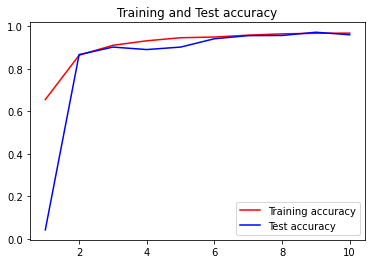

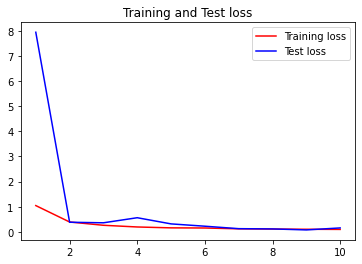

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()

plt.show()

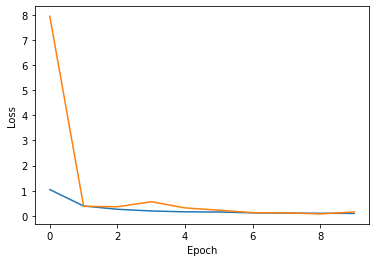

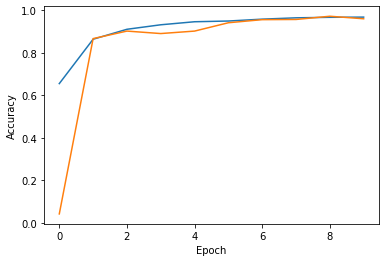

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [35]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp5on9gouh/assets


INFO:tensorflow:Assets written to: /tmp/tmp5on9gouh/assets


In [36]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)